# Test 2: Look at behaviour of one tennant over time

In [23]:
import sys
sys.path.append('C:\\Users\\sumaiyah\\Documents\\Univeristy\\diss\\AIaaS\\real-world-data')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from notebooks import FIC_10minute_7days_filepath, FIC_60minute_7days_filepath 

In [5]:
FIC_10minute_7days_df = pd.read_pickle(FIC_10minute_7days_filepath)
FIC_10minute_7days_df['HashOwner'].value_counts()

fd8a2430aa1d1b6fb9e059ff6268eabf8bbd77e68a6d5f38195a67820149b0ab    1975
486e10ac87f2c7495ab672094483c49e935e6f7e19b2b9b7157be7f9f949244c     933
f0417cb85bd1c751561867f042b6623bc7885e27669a11bc7f9a64dd7d3e4eb9     630
23585e5c9ad9d7de0016aee0cae0ef9339aa943e635a0d61af082dbfe4688c40     317
7443ba68131cffcdf846c2c74a7f0030cf19240d7e97e3c7f3d22324a065d5ca     314
                                                                    ... 
069a6f9843f3f8e7d8d57dc8845dae7bc4879d28354dee3dc1b0c2ce00b52d4a       1
52c75cbc40288ed06dd57b0feb9613550994da847e82942c357f7a99eb77341d       1
decb4c5a9c0877225fa6c52d4b02c6a0b7a00c3db2aac2736a8a82594d5a6f38       1
8f8d59fe1beaa7bb01e1bf84271e03390d6c687fd98403da626bb8b9c228c708       1
a0a1ae654568b8584829e728a5a8254895443e04f71cc5f6fe0cc363dead88c4       1
Name: HashOwner, Length: 13192, dtype: int64

In [7]:
single_tenant_df = FIC_10minute_7days_df[FIC_10minute_7days_df['HashOwner'] == 'fd8a2430aa1d1b6fb9e059ff6268eabf8bbd77e68a6d5f38195a67820149b0ab']

# Preprocess data
single_tenant_df = single_tenant_df.drop(columns=['HashOwner', 'HashApp', 'HashFunction', 'Trigger'])
single_tenant_df = (single_tenant_df + 1).apply(np.log)

Results of K-means Clustering with k=5
[1828, 63, 47, 33, 4] 



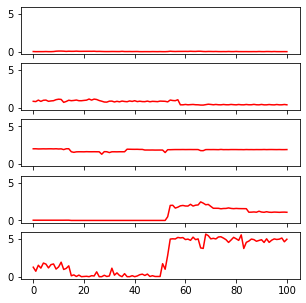

In [139]:
from sklearn.cluster import KMeans
k=5
print('Results of K-means Clustering with k=%d' % k)

km = KMeans(n_clusters=k)
kmeans_predictions = km.fit_predict(single_tenant_df.values)

km_clusters = pd.Series(kmeans_predictions)
print(km_clusters.value_counts().values.tolist(), '\n')

fig, ax = plt.subplots(5, 1, figsize=(5, 5), sharex=True, sharey=True)
cluster_order = pd.Series(kmeans_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    row = yi
    cluster_index = cluster_order[yi]
    
#     for xx in single_tenant_df[kmeans_predictions == cluster_index].values:
#         ax[row].plot(xx.ravel()[::10], "k-", alpha=.08)
    ax[row].plot(km.cluster_centers_[cluster_index].ravel()[::10], "r-")

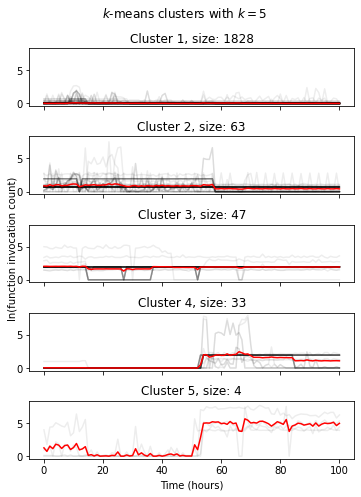

In [182]:
fig, ax = plt.subplots(5, 1, figsize=(5, 7), sharex=True, sharey=True)
cluster_order = pd.Series(kmeans_predictions).value_counts().keys().tolist()
for yi in range(len(cluster_order)):
    row = yi
    cluster_index = cluster_order[yi]
    
    for xx in single_tenant_df[kmeans_predictions == cluster_index].values[:200]:
        ax[row].plot(xx.ravel()[::10], "k-", alpha=.07)
    ax[row].plot(km.cluster_centers_[cluster_index].ravel()[::10], "r-")
    ax[row].set_title('Cluster %d, size: %d' % (yi+1, km_clusters.value_counts().values.tolist()[yi]))

fig.suptitle('$k$-means clusters with $k=5$')
plt.xlabel('Time (hours)')
fig.text(0.02, 0.5, 'ln(function invocation count)', ha='center', va='center', rotation='vertical')
fig.tight_layout()

fig.savefig('T2_centers.png', dpi = 200)